## Research question and data collected to support it
1. Comparing data between NFL teams will point out a clear team with the best offensive production.
   * Compare offensive stats
   * Compare average stats per game for each team (first downs, possesion time, points)
   * Do wieghted comparision 3x points, 2x first downs, 1x possession
   * Compare Drive Averages
     

In [2]:
import requests
import pprint as p
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

## Getting data sources
1. API
2. CSV
3. CSV

In [1]:
url = "https://nfl-team-stats1.p.rapidapi.com/teamStats"

headers = {
	"X-RapidAPI-Key": "813bfe82a6msh542b7265946958bp14def4jsn0930db7c4d49",
	"X-RapidAPI-Host": "nfl-team-stats1.p.rapidapi.com"
}

response = requests.get(url, headers=headers).json()
#p.pprint(response['stats']['Miami Dolphins']['Offense'])

NameError: name 'requests' is not defined

In [3]:
NFL_DF1 = pd.read_csv('team_stats.csv')
NFL23_1 = NFL_DF1
NFL_DF1

,week,game_id,away,home,home_ppg,away_ppg,home_yards_ppa,away_yards_ppa,home_ypg,away_ypg,home_tom,away_tom,home_oypg,away_oypg,home_rpf,away_rpr
0,1,1,Buffalo,LA Rams,10.0,31.0,5.9,9.6,243.0,413.0,1.0,-1.0,413.0,243.0,145.20,156.40
1,1,2,New Orleans,Atlanta,26.0,27.0,6.5,7.9,416.0,385.0,-1.0,1.0,385.0,416.0,178.20,181.60
2,1,3,Cleveland,Carolina,24.0,26.0,8.7,4.3,261.0,355.0,-1.0,1.0,355.0,261.0,145.20,137.20
3,1,4,San Francisco,Chicago,19.0,10.0,7.1,5.9,204.0,331.0,1.0,-1.0,331.0,204.0,125.20,120.60
4,1,5,Pittsburgh,Cincinnati,20.0,23.0,6.4,5.1,432.0,267.0,-5.0,5.0,267.0,432.0,155.60,155.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,18,268,NY Giants,Philadelphia,28.1,21.5,8.1,6.6,389.1,333.9,0.5,0.2,301.5,358.2,160.04,155.96
268,18,269,Arizona,San Francisco,26.5,20.0,7.9,6.0,365.6,323.5,0.8,-0.3,300.6,348.9,154.50,150.42
269,18,270,LA Rams,Seattle,23.9,18.1,7.5,6.6,351.5,280.5,0.1,-0.1,361.7,341.1,162.44,141.12
270,18,271,Dallas,Washington,18.9,27.5,6.8,7.0,330.3,354.9,-0.3,0.6,304.6,330.2,144.30,156.64


In [4]:
NFL_DF2 = pd.read_csv('nfl_team_stats_2002-2023.csv')
NFL23_2 = NFL_DF2.query('season == 2023' ) #filtering to see just stats for 2023 season 


## Cleaning up data
* Week order - The data frame contains the playoffs as thier game names so i had to add a column so weeks were all integers


In [18]:
#Might need to run twice if a error comes
week_order = {
    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18,
    'Wildcard': 19, 'Division': 20, 'Conference': 21, 'Superbowl': 22
}

NFL23_2.loc[:, 'Week'] = NFL23_2['week'].map(week_order,) #adding the week column maping each week to its week in the dictionary
NFL23_2 = NFL23_2.sort_values(by='Week',ascending=True) #sort by the new week



In [6]:
#grouped_home = NFL23_2.groupby('home').sum().sort_values('score_home',ascending=False)
#grouped_away = NFL23_2.groupby('away').sum().sort_values('score_away',ascending=False)


## Create a pivot table for total points score in the season, then graph this pivot table

In [7]:
home_pivot = NFL23_2.pivot_table(values='score_home', index='home', columns='Week', aggfunc='sum', fill_value=0)#.sum(axis=1).sort_values(ascending=False)#.sort_values('score_home',ascending=False).head(5)
away_pivot = NFL23_2.pivot_table(values='score_away', index='away', columns='Week', aggfunc='sum', fill_value=0)#.sum(axis=1).sort_values(ascending=False)
away_pivot,home_pivot

(Week        1   2   3   4   5   6   7   8   9   10  ...  13  14  15  16  17  \
 away                                                ...                       
 49ers       30  30   0   0   0  17  17   0   0  34  ...  42   0  45   0  27   
 Bears        0  17  10   0  40   0   0  13  17   0  ...   0   0  17   0   0   
 Bengals      3   0   0   3  34   0   0  31   0   0  ...  34   0   0  11  17   
 Bills       16   0  37   0   0   0  25   0  18   0  ...   0  20   0  24   0   
 Broncos      0   0  20  31   0   8   0   0   0  24  ...  17  24  17   0   0   
 Browns       0  22   0   0   0   0  39  20   0  33  ...  19   0   0  36   0   
 Buccaneers  20   0   0  26   0   0   0  18  37   0  ...   0  29  34   0   0   
 Cardinals   16   0   0  16   0   9  10   0   0   0  ...  24   0   0  16  35   
 Chargers     0  24  28   0   0   0  17   0  27   0  ...   6   0  21   0   9   
 Chiefs       0  17   0  23  27   0   0   9   0   0  ...  19   0  27   0   0   
 Colts        0  31  22   0   0  20   0 

<Figure size 1000x600 with 0 Axes>

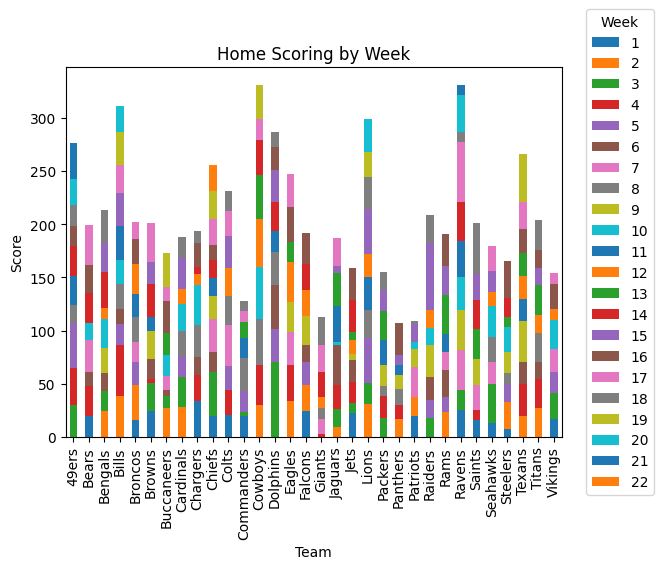

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

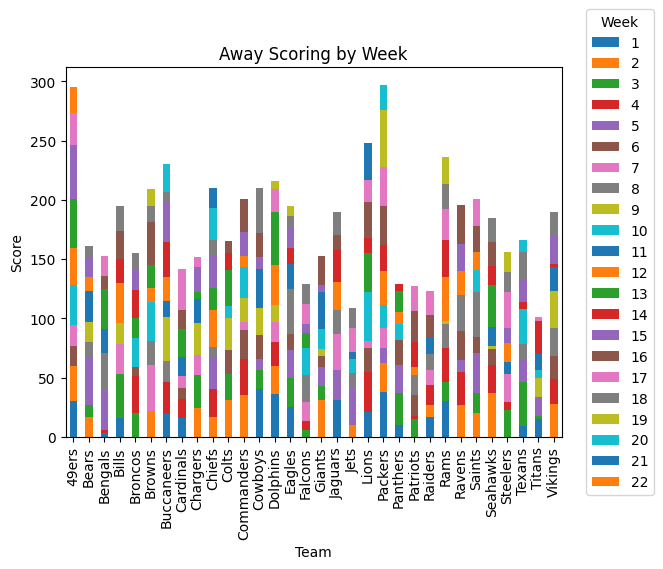

<Figure size 640x480 with 0 Axes>

In [8]:
#Home table
plt.figure(figsize=(10, 6)) #setting size
home_pivot.plot(stacked=True,kind='bar') #creating the graph
plt.title('Home Scoring by Week') #setting tittle
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(title='Week',loc='right',bbox_to_anchor=(1.2, .5)) #setting the legend to be off the graph
plt.ylabel('Score') #xlabel
plt.xlabel('Team') #ylabel
plt.show()
plt.savefig('HomeScoringTable')

#Away table
plt.figure(figsize=(10, 6))
away_scoring = away_pivot.plot(kind='bar', stacked=True)
plt.title('Away Scoring by Week')
plt.legend(title='Week',loc='right',bbox_to_anchor=(1.2, .5))
plt.ylabel('Score')
plt.xlabel('Team')
plt.show()
plt.savefig('AwayScoringTable')

## Create a better, cleaned up DF for analyzing 
* Get home and away score/first downs/possession and strip away the home/away tittle to combine
* Then add all those altered df to one df called team_totals 

In [9]:
#create a df for home and away teams and name them the same to combine 
home_scores = NFL23_2[['home', 'Week', 'score_home']].rename(columns={'home': 'team', 'score_home': 'score'})
away_scores = NFL23_2[['away', 'Week', 'score_away']].rename(columns={'away': 'team', 'score_away': 'score'})
home_first_downs = NFL23_2[['home', 'Week', 'first_downs_home']].rename(columns={'home': 'team', 'first_downs_home': 'first_downs'})
away_first_downs = NFL23_2[['away', 'Week', 'first_downs_away']].rename(columns={'away': 'team', 'first_downs_away': 'first_downs'})
home_possession = NFL23_2[['home','Week','possession_home']].rename(columns={'home':'team','possession_home':'possession'})
away_possession = NFL23_2[['away','Week','possession_away']].rename(columns={'away':'team','possession_away':'possession'})
home_yards = NFL23_1[['home','week','home_oypg']].rename(columns={'home':'team','home_oypg':'yards_per_game','week':'Week'}).reset_index(drop=True)
away_yards = NFL23_1[['away','week','away_oypg']].rename(columns={'away':'team','away_oypg':'yards_per_game','week':'Week'}).reset_index()


## Change team names from DF1 to fit into cleaned up data  

In [10]:
team_mapping = {
    "Arizona": "Cardinals",
    "Atlanta": "Falcons",
    "Baltimore": "Ravens",
    "Buffalo": "Bills",
    "Carolina": "Panthers",
    "Chicago": "Bears",
    "Cincinnati": "Bengals",
    "Cleveland": "Browns",
    "Dallas": "Cowboys",
    "Denver": "Broncos",
    "Detroit": "Lions",
    "Green Bay": "Packers",
    "Houston": "Texans",
    "Indianapolis": "Colts",
    "Jacksonville": "Jaguars",
    "Kansas City": "Chiefs",
    "Las Vegas": "Raiders",
    "LA Chargers": "Chargers",
    "LA Rams": "Rams",
    "Miami": "Dolphins",
    "Minnesota": "Vikings",
    "New England": "Patriots",
    "New Orleans": "Saints",
    "NY Giants": "Giants",
    "NY Jets": "Jets",
    "Philadelphia": "Eagles",
    "Pittsburgh": "Steelers",
    "San Francisco": "49ers",
    "Seattle": "Seahawks",
    "Tampa Bay": "Buccaneers",
    "Tennessee": "Titans",
    "Washington": "Commanders"
}

#get the teams columns correct 
home_yards.loc[:, 'Team'] = home_yards['team'].map(team_mapping,)
away_yards.loc[:, 'Team'] = away_yards['team'].map(team_mapping,)
home_yards.loc[:, 'team'] = home_yards['Team']
away_yards.loc[:, 'team'] = away_yards['Team']

#Finalize home and away yards with proper column names 
home_yards = home_yards[['Team','Week','yards_per_game']].rename(columns={'Team':'team','yards_per_game':'yards_per_game','Week':'Week'})
away_yards = away_yards[['Team','Week','yards_per_game']].rename(columns={'Team':'team','yards_per_game':'yards_per_game','Week':'Week'})

#NFL23_2.loc[:, 'Team'] = NFL23_2['week'].map(week_order,)

## Add all the data to the smaller dataframe

In [11]:
totalScores = pd.concat([home_scores,away_scores])
total_firsts = pd.concat([home_first_downs,away_first_downs])
team_totals = pd.concat([home_possession,away_possession])
total_yards = pd.concat([home_yards,away_yards],ignore_index=True)

team_totals['score'] = totalScores['score']
team_totals['first_downs'] = total_firsts['first_downs']
team_totals = team_totals.merge(total_yards[['team', 'Week', 'yards_per_game']], on=['team', 'Week'], how='left')
team_totals.query('team=="Lions"')

,team,Week,possession,score,first_downs,yards_per_game
27,Lions,2,30:48,31,25,425.5
40,Lions,3,32:57,20,18,408.0
73,Lions,5,31:15,42,23,428.6
114,Lions,8,39:33,26,29,421.3
160,Lions,11,19:36,31,23,415.9
178,Lions,12,31:56,22,25,414.5
219,Lions,15,31:18,42,29,398.5
267,Lions,18,25:01,30,19,392.4
274,Lions,19,29:55,24,23,NaN
278,Lions,20,32:00,31,26,NaN


## Convert possesion time into seconds integer in order to take average 

In [12]:
def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':')) #break down the minutes and seconds and return it proper
    return minutes * 60 + seconds
    
team_totals['possession']= team_totals['possession'].apply(convert_to_seconds) #add converted possesion time to DF 
team_totals

,team,Week,possession,score,first_downs,yards_per_game
0,Chiefs,1,1642,20,17,282.0
1,Jets,1,1670,22,13,274.0
2,Giants,1,2008,0,14,359.0
3,Seahawks,1,1237,13,13,433.0
4,Chargers,1,1961,34,30,320.0
...,...,...,...,...,...,...
565,Packers,20,1819,21,20,NaN
566,Chiefs,20,1377,27,21,NaN
567,Lions,21,1668,31,28,NaN
568,Chiefs,21,2250,17,22,NaN


## Take game averages and sort them to show top teams 

In [13]:
#Create a groupbyDF of aveages for each team rounded to 2
averages = team_totals.groupby('team').agg({'score': 'mean', 'first_downs': 'mean','possession':'mean','yards_per_game':'mean'}).round(2).reset_index()
#Seperate out the top performers 
avgScore = averages.sort_values('score',ascending=False).head(5)
avgFirsts = averages.sort_values('first_downs',ascending=False).head(5)
avgPoss = averages.sort_values('possession',ascending=False).head(5)
avgYards = averages.sort_values('yards_per_game',ascending=False).head(5)

averages.to_csv('Team Averages') #saving avegas DF
#Remember possession time is MMSS

## Take the weighted values to better establish best teams
* Possession x1
* Firsts x2
* Yards x 2
* Score x4

In [27]:
weightedDict = {}

# Calculate weighted values for each team
for team in averages['team']:  
    #make sure one iteration per unique team
    team_data = averages[averages['team'] == team]
    weightedAvgYards = team_data['yards_per_game'] * 2
    weightedAvgScore = team_data['score'] * 4
    weightedAvgFirst = team_data['first_downs'] * 2
    # Assuming you might reintroduce possession calculation
    weightedAvgPoss = team_data['possession'] * 1
    # Calculate the total weighted average for the team
    teamWeighted = round((weightedAvgScore.sum() + weightedAvgFirst.sum() + weightedAvgPoss.sum() + weightedAvgYards.sum()) / 9,2)  # Adjusted the denominator to account for the weights
    weightedDict[team] = teamWeighted

# Output the dictionary
bestWeighted = 0
bestTeam = ''

for team,weight in weightedDict.items():
    if weight > bestWeighted:
        bestWeighted = weight
        bestTeam = team
print('The team with the hieghest weighted score is the',bestTeam,'with a score of',bestWeighted)
weightedDict


The team with the hieghest weighted score is the Lions with a score of 316.94


{'49ers': 287.03,
 'Bears': 305.4,
 'Bengals': 292.17,
 'Bills': 296.8,
 'Broncos': 275.24,
 'Browns': 305.24,
 'Buccaneers': 279.1,
 'Cardinals': 289.72,
 'Chargers': 283.99,
 'Chiefs': 294.77,
 'Colts': 281.51,
 'Commanders': 285.21,
 'Cowboys': 300.86,
 'Dolphins': 296.12,
 'Eagles': 289.01,
 'Falcons': 292.27,
 'Giants': 285.22,
 'Jaguars': 298.06,
 'Jets': 274.2,
 'Lions': 316.94,
 'Packers': 285.98,
 'Panthers': 295.28,
 'Patriots': 267.64,
 'Raiders': 284.45,
 'Rams': 294.15,
 'Ravens': 305.43,
 'Saints': 296.7,
 'Seahawks': 279.05,
 'Steelers': 291.01,
 'Texans': 297.76,
 'Titans': 293.06,
 'Vikings': 294.84}

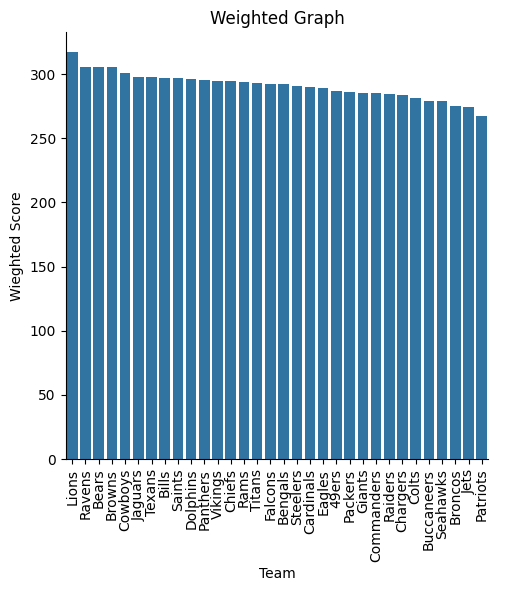

In [36]:

#turn dictionary into dataframe
weightedDF = pd.DataFrame(list(weightedDict.items()), columns=['Team', 'Wieghted Score']).sort_values('Wieghted Score',ascending=False)

# plot the weighted values 
weightedGraph = sb.catplot(data=weightedDF, x='Team', y='Wieghted Score', kind='bar').set_xticklabels(rotation=90)
plt.title('Weighted Graph')

plt.savefig('weightedGraph')

## Graph each game average 

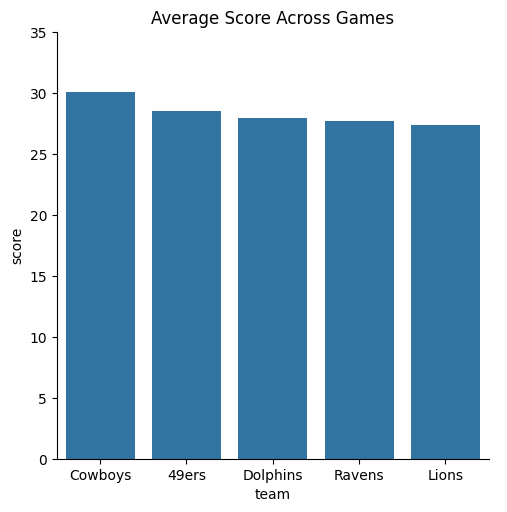

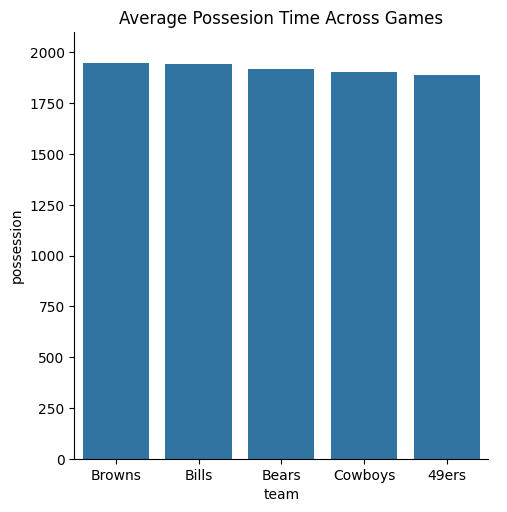

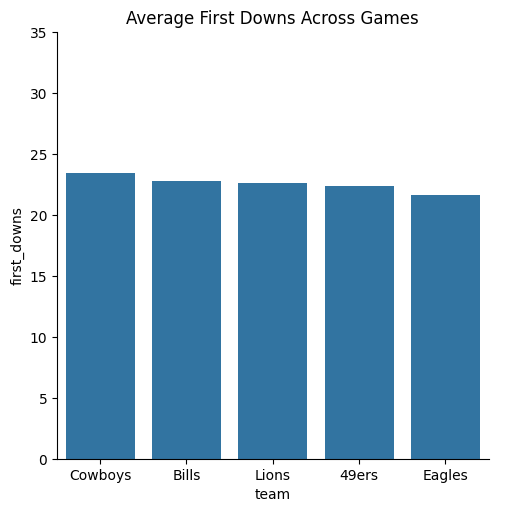

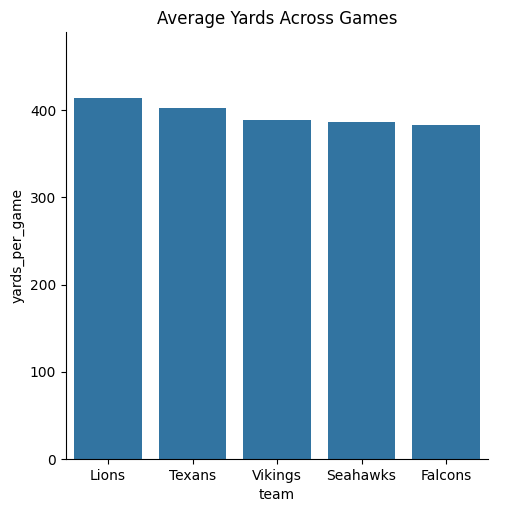

In [22]:
avgScoreGraph = sb.catplot(data=avgScore,x='team',y='score',kind='bar')
plt.ylim(0,35)
plt.title('Average Score Across Games')
plt.savefig('avgScoreGraph')
ax = avgScoreGraph.facet_axis(0, 0)  # Since catplot can generate a FacetGrid, get the axis
avgPossGraph = sb.catplot(data=avgPoss,x='team',y='possession',kind='bar')
plt.ylim(0,2100)
plt.title('Average Possesion Time Across Games')
plt.savefig('avgPossesionGraph')
avgFirstsGraph = sb.catplot(data=avgFirsts,x='team',y='first_downs',kind='bar')
plt.ylim(0,35)
plt.title('Average First Downs Across Games')
plt.savefig('avgFirstsGraph')
avgYardsGraph = sb.catplot(data=avgYards,x='team',y='yards_per_game',kind='bar')
plt.title('Average Yards Across Games')
plt.ylim(0,490)
plt.savefig('avgYardsGraph')

## Iterate through API for each team and get drive averages

In [16]:
# list of team names courtesy of AI
nfl_teams = [
    "Arizona Cardinals",
    "Atlanta Falcons",
    "Baltimore Ravens",
    "Buffalo Bills",
    "Carolina Panthers",
    "Chicago Bears",
    "Cincinnati Bengals",
    "Cleveland Browns",
    "Dallas Cowboys",
    "Denver Broncos",
    "Detroit Lions",
    "Green Bay Packers",
    "Houston Texans",
    "Indianapolis Colts",
    "Jacksonville Jaguars",
    "Kansas City Chiefs",
    "Las Vegas Raiders",
    "Los Angeles Chargers",
    "Los Angeles Rams",
    "Miami Dolphins",
    "Minnesota Vikings",
    "New England Patriots",
    "New Orleans Saints",
    "New York Giants",
    "New York Jets",
    "Philadelphia Eagles",
    "Pittsburgh Steelers",
    "San Francisco 49ers",
    "Seattle Seahawks",
    "Tampa Bay Buccaneers",
    "Tennessee Titans",
    "Washington Commanders"
]
#create dictionary for each teams drive averages
driveAverageDict = {}
for team in nfl_teams:
    team = response['stats'][team]['Drive Averages']['Tm'] #dicate team
    data = response['stats'][team]['Drive Averages']['Average Drive'] #dictate averages 
    driveAverageDict[team] = data #put it into dictionary 
p.pprint(driveAverageDict)

{'Arizona Cardinals': {'Plays': '6.1',
                       'Pts': '1.83',
                       'Start': 'Own 26.2',
                       'Time': '2:46',
                       'Yds': '30.4'},
 'Atlanta Falcons': {'Plays': '5.8',
                     'Pts': '1.60',
                     'Start': 'Own 27.5',
                     'Time': '2:32',
                     'Yds': '28.8'},
 'Baltimore Ravens': {'Plays': '5.6',
                      'Pts': '2.37',
                      'Start': 'Own 32.8',
                      'Time': '2:42',
                      'Yds': '31.8'},
 'Buffalo Bills': {'Plays': '6.3',
                   'Pts': '2.37',
                   'Start': 'Own 29.0',
                   'Time': '3:01',
                   'Yds': '35.1'},
 'Carolina Panthers': {'Plays': '6.3',
                       'Pts': '1.19',
                       'Start': 'Own 25.6',
                       'Time': '2:56',
                       'Yds': '25.1'},
 'Chicago Bears': {'Plays': '6.2',
     

In [17]:
#list of top teams based on previous analysis 
topTeams = ['Dallas Cowboys',
            "Baltimore Ravens",
            "Buffalo Bills",
            "Chicago Bears",
"Detroit Lions",
 "Kansas City Chiefs",
"Philadelphia Eagles",
"San Francisco 49ers",]
for team in topTeams:
    print(team,driveAverageDict[team])

Dallas Cowboys {'Plays': '6.8', 'Yds': '37.3', 'Start': 'Own 28.9', 'Time': '3:11', 'Pts': '2.67'}
Baltimore Ravens {'Plays': '5.6', 'Yds': '31.8', 'Start': 'Own 32.8', 'Time': '2:42', 'Pts': '2.37'}
Buffalo Bills {'Plays': '6.3', 'Yds': '35.1', 'Start': 'Own 29.0', 'Time': '3:01', 'Pts': '2.37'}
Chicago Bears {'Plays': '6.2', 'Yds': '29.8', 'Start': 'Own 29.8', 'Time': '2:57', 'Pts': '1.90'}
Detroit Lions {'Plays': '6.2', 'Yds': '35.8', 'Start': 'Own 30.4', 'Time': '2:51', 'Pts': '2.44'}
Kansas City Chiefs {'Plays': '6.2', 'Yds': '33.3', 'Start': 'Own 28.6', 'Time': '2:53', 'Pts': '2.01'}
Philadelphia Eagles {'Plays': '6.5', 'Yds': '34.0', 'Start': 'Own 28.9', 'Time': '2:59', 'Pts': '2.33'}
San Francisco 49ers {'Plays': '5.9', 'Yds': '37.8', 'Start': 'Own 30.4', 'Time': '2:57', 'Pts': '2.70'}
